In [19]:
import cv2
import cv2 as cv
from matplotlib import pyplot as plt

# Task2

### Name: 
### ID:


## Question 1:
- Compute the histogram of the image `mountain.jpeg` using bins ranging from 0 to 255 and display

- Find the average number of pixels in the histogram.

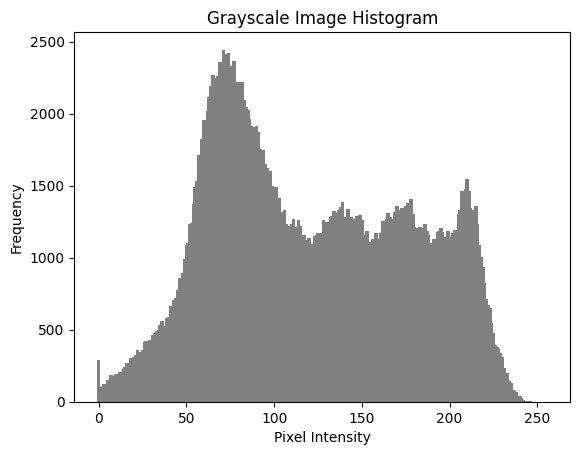

In [20]:
# Question 1
# You code
# Read the image
image = cv.imread('./mountain.jpg', cv.IMREAD_GRAYSCALE)

# plt.hist(image,bins=range(0,255))
# plt.show()


# Calculate the histogram
bins = 256

#cv2.calcHist([img], channels, mask, bins, ranges)
hist = cv2.calcHist([image], [0], None, [bins], [0, 256]) # histogram of blue
#hist = cv2.calcHist([image], [1], None, [bins], [0, 256]) # histogram of green
#hist = cv2.calcHist([image], [2], None, [bins], [0, 256]) # histogram of red

# numpy histogram function can also be used
#hist, bin_edges = np.histogram(image, bins=256)

# Plot the histogram
plt.bar(range(256), hist.flatten(), width=2.0, color='gray')
plt.title('Grayscale Image Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

## Question 2:
Remove noise from the image`burj_sp.jpg` and display the resultant image. Use gray colormap to display.

(-0.5, 639.5, 426.5, -0.5)

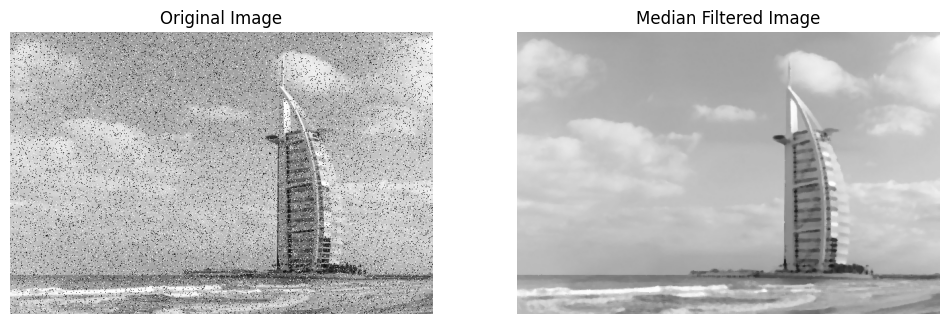

In [21]:
# Question 2
# Your code
image = cv.imread('burj_sp.jpg', cv.IMREAD_GRAYSCALE)

kernel_size = (6, 6)
median_filtered_image = cv2.medianBlur(image, ksize=5)

plt.figure(figsize=(12, 10))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(median_filtered_image, cv2.COLOR_BGR2RGB))
plt.title('Median Filtered Image')
plt.axis('off')

## Question  3
What is the Response of the Harris Matrix $ H_1 $ and $ H_2 $ When $ k = 0.05 $?

Given the Harris matrices:

$$
H_1 = 
\begin{bmatrix} 
11 & 2 \\ 
2 & 10 
\end{bmatrix}
$$

$$
H_2 = 
\begin{bmatrix} 
10 & 1 \\ 
1 & 9 
\end{bmatrix}
$$

Write python code to compute the response $R$

In [24]:
# Question 3
import numpy as np

k=0.05
H1 = np.array([[11,2],[2,10]])
H2 = np.array([[10,1],[1,9]])

H1R = np.linalg.det(H1) - 0.05*(np.trace(H1)**2)
H2R = np.linalg.det(H2) - 0.05*(np.trace(H2)**2)

print("H1R = ",H1R)
print("H2R = ",H2R)


H1R =  83.95000000000007
H2R =  70.94999999999999


## Question 4
In this question, you will generate a hybrid images by combining the low-frequency content of one image with the high-frequency content of another image. This technique produces interesting visual effects where, at different viewing distances, the image appears different based on which frequencies are more perceptible.
Complete all the steps below. 

In [23]:
# Read the two images in color
image1 = cv2.imread('bird.bmp')
image2 = cv2.imread('plane.bmp')

# I --> apply gaussian filter --> Il image with low frequency content
# Ih image with high frequency content = I - Il


In [7]:
!pip install numpy

In [25]:
import numpy as np

# Step 1: Convert images to float and divide by 255.0.
image1 = image1.astype(np.float32) / 255.0
image2 = image2.astype(np.float32) / 255.0


In [26]:
# Step 2: Extract the low-frequency component of image1 by applying Gaussian blur to image1
sigma = 2
ksize = sigma * 4 + 1

image1_low_freq = cv2.GaussianBlur(image1, (ksize,ksize),sigma, sigma, borderType=cv2.BORDER_CONSTANT)


In [30]:
# Step 3: Extract the high-frequency component of image2. 
# The easiest way to do this is to subtract a blurred version of image2 from the original version of image2. 
# This will give you an image centered at zero

image2_low_freq =  cv2.GaussianBlur(image2, (ksize,ksize), sigma,sigma, borderType=cv2.BORDER_CONSTANT)
image2_high_freq = image2 - image2_low_freq

In [31]:
# Step 4: Hybrid Image Construction: 
# Combine (add) the low frequencies from one image and the high frequencies from the other image to create the hybrid image.

hybrid = image1_low_freq + image2_high_freq

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.14794773..0.9696639].


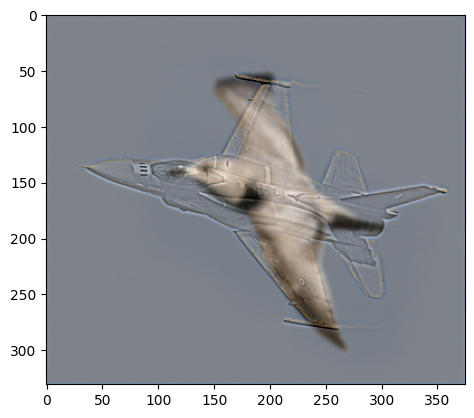

In [32]:
# Step 5: Show the Hybrid image using matplotlib

plt.imshow(cv2.cvtColor(hybrid,cv2.COLOR_BGR2RGB))
plt.show()

# Question 5
An image $I$ undergoes an affine intensity change,$I^c=aI+b$.
Let $R$ be the Harris corner response of the original image $I$.
Write Python code to compute the Harris corner response of the image $I^c$, without computing the derivatives of the image $I^c$.


In [ ]:
# Question 5
# Your code

# Rc = a**2*R